In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/petrol-consumption/petrol_consumption.csv


'''
The petrol consumption dataset comprises several key columns: "Petrol_tax" indicating the tax imposed on petrol, "Average_income" denoting the average income of the population, "Paved_Highways" representing the extent of road infrastructure, "Population_Driver_licence(%)" reflecting the percentage of the population holding driver's licenses, and "Petrol_Consumption" quantifying the amount of petrol consumed. These variables collectively offer insights into the relationship between taxation policies, socioeconomic factors, infrastructure development, and driving habits on petrol consumption patterns. Analyzing this dataset can provide valuable insights for policymakers, urban planners, and energy analysts aiming to understand and manage petrol usage efficiently.
'''

### Importing Libraries

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Reading the csv file

In [5]:
df=pd.read_csv('/kaggle/input/petrol-consumption/petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [6]:
#Number of rows and columns in a dataset
df.shape

(48, 5)

In [7]:
#Summary of number of entries, data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [8]:
#Statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
Average_income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
Paved_Highways,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
Population_Driver_licence(%),48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
Petrol_Consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


In [9]:
#Finding the outliers percentage
for k,v in df.items():
    q1=v.quantile(0.25)
    q3=v.quantile(0.75)
    irq=q3-q1
    v_col=v[(v<=q1-1.5*irq) | (v>=q3+1.51*irq)]
    perc=np.shape(v_col)[0]*100/np.shape(df)[0]
    print('Column {} outliers ={:.2f}%'.format(k,perc))

Column Petrol_tax outliers =4.17%
Column Average_income outliers =0.00%
Column Paved_Highways outliers =4.17%
Column Population_Driver_licence(%) outliers =2.08%
Column Petrol_Consumption outliers =4.17%


In [10]:
#Partitioning the features and target variable
X=df.drop(['Petrol_Consumption'],axis=1)
y=df['Petrol_Consumption']
X.shape,y.shape

((48, 4), (48,))

In [11]:
#Separating the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((33, 4), (15, 4))

In [12]:
#intializing a Decision Tree Regressor model with maximum depth of 4 and maximum number of features set to 4, then fitting the model to the training data.
from sklearn.tree import DecisionTreeRegressor
Dtr=DecisionTreeRegressor(max_depth=4,max_features=4)
Dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, max_features=4)

In [13]:
##Predicting the target variable using Decision Tree Regressor trained model on test dataset

y_pred=Dtr.predict(X_test)

In [14]:
# Calculating Metrics of regression model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print('mean squared error:',mean_squared_error(y_test,y_pred))
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score:',r2_score(y_test,y_pred))

mean squared error: 10779.115826530611
mean absolute error: 90.5957142857143
Root Mean Square Error: 103.82252080608818
R2_score: -1.0730202856988655


'''
Using DecisionTreeRegressor's feature_importances_ attribute to rank the importance of features in predicting the target variable and then sorting them in descending order to identify the most influential predictors.
'''

In [15]:
Dtr.feature_importances_
pd.Series(Dtr.feature_importances_,index=X.columns).sort_values(ascending=False)

Population_Driver_licence(%)    0.558920
Average_income                  0.345288
Paved_Highways                  0.055701
Petrol_tax                      0.040091
dtype: float64

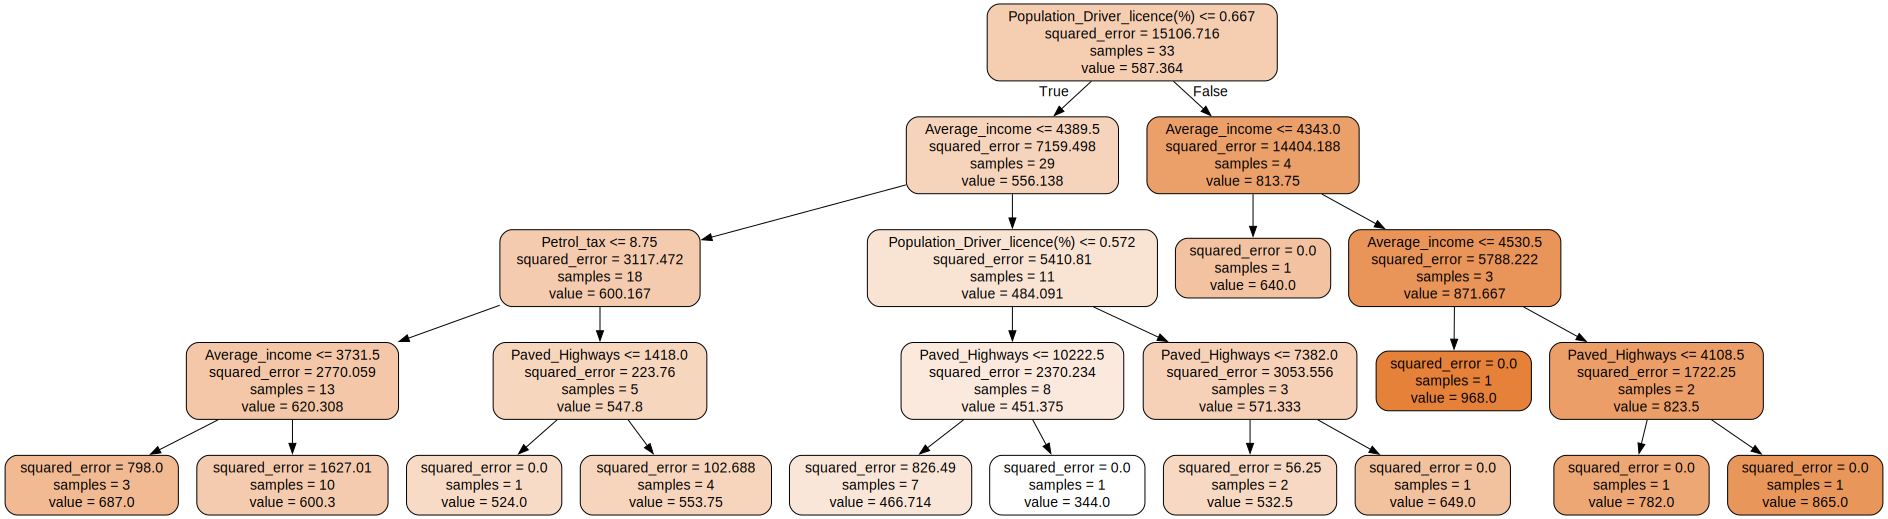

In [16]:
#Generating a visualization of the decision tree model using Graphviz
from sklearn.tree import export_graphviz

dot_data=export_graphviz(Dtr,filled=True,rounded=True,
                         feature_names=X.columns,out_file=None)
import graphviz

graphviz.Source(dot_data)

In [17]:
#Performing grid search cv for decision tree regressor with max_depth and max_features as parameters
from sklearn.model_selection import GridSearchCV

param_grid=[{'max_depth':[3,4,5,None],'max_features':[3,4,5,6,7]}]
gs=GridSearchCV(estimator=DecisionTreeRegressor(random_state=1),param_grid=param_grid,cv=10)

gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=1),
             param_grid=[{'max_depth': [3, 4, 5, None],
                          'max_features': [3, 4, 5, 6, 7]}])

In [36]:
gs.cv_results_['params']

[{'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 3, 'max_features': 5},
 {'max_depth': 3, 'max_features': 6},
 {'max_depth': 3, 'max_features': 7},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 4, 'max_features': 5},
 {'max_depth': 4, 'max_features': 6},
 {'max_depth': 4, 'max_features': 7},
 {'max_depth': 5, 'max_features': 3},
 {'max_depth': 5, 'max_features': 4},
 {'max_depth': 5, 'max_features': 5},
 {'max_depth': 5, 'max_features': 6},
 {'max_depth': 5, 'max_features': 7},
 {'max_depth': None, 'max_features': 3},
 {'max_depth': None, 'max_features': 4},
 {'max_depth': None, 'max_features': 5},
 {'max_depth': None, 'max_features': 6},
 {'max_depth': None, 'max_features': 7}]

In [18]:
#Accessing the best estimator from a grid search object.
gs.best_estimator_

DecisionTreeRegressor(max_depth=3, max_features=4, random_state=1)

In [19]:
#intializing a Decision Tree Regressor model with best parameters, then fitting the model to the training data.

Dcrb=DecisionTreeRegressor(max_depth=3,max_features=4)
Dcrb.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features=4)

In [20]:
#Predicting the target variable using Decision Tree Regressor trained model on test dataset

y_pred_b=Dcrb.predict(X_test)

In [41]:
print('mean squared error:',mean_squared_error(y_test,y_pred_b))
print('mean absolute error:',mean_absolute_error(y_test,y_pred_b))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,y_pred_b)))
print('R2_score:',r2_score(y_test,y_pred_b))

mean squared error: 3805.986842099495
mean absolute error: 47.9776923076923
Root Mean Square Error: 61.69268062014727
R2_score: 0.2680394145727746


In [22]:
dot_data_b=export_graphviz(Dcrb,filled=True,rounded=True,feature_names=X.columns,out_file=None)

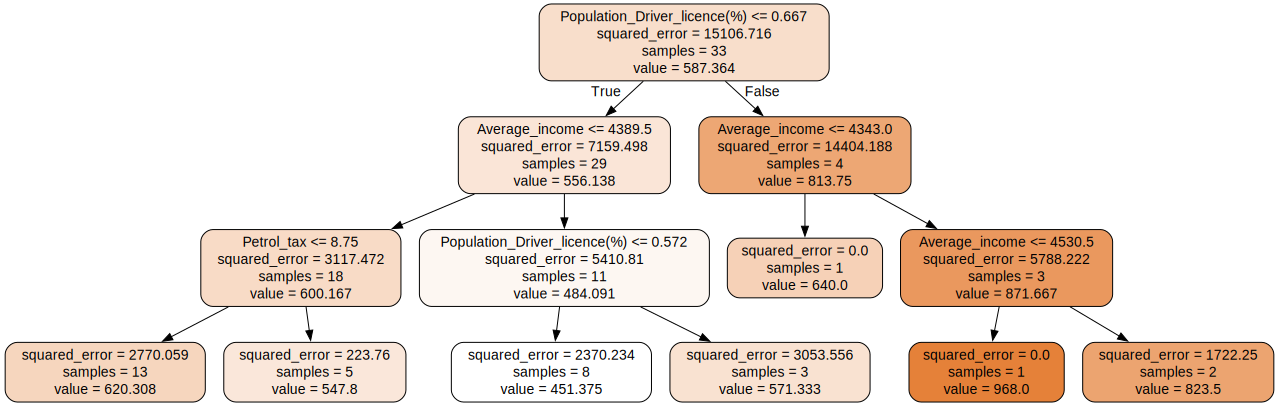

In [23]:
#Generating a visualization of the decision tree model using Graphviz

graphviz.Source(dot_data_b)